In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from google.colab import drive
drive.mount('/content/drive')
imgpath = '/content/drive/MyDrive/class/DIP1/DIP4E'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exercise
- 두 개의 noisy image를 각각 f1, f2로 불러오고 적절한 restoration(denoising)을 수행해보자.

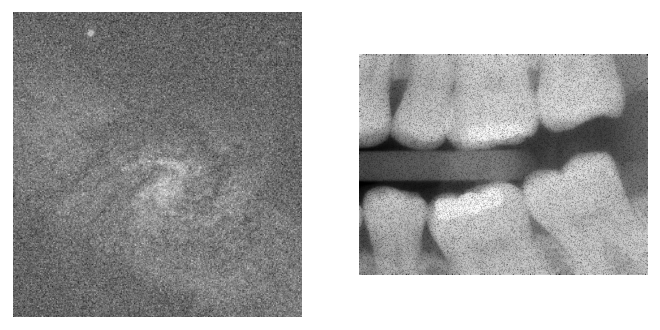

In [47]:
f1 = plt.imread(imgpath+'/galaxy-pair-noisy.tif')
f2 = plt.imread(imgpath+'/dentalXray-pepper-noise.tif')

plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(f1,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(f2,cmap='gray')
plt.axis('off')
plt.show()

- 복원코드를 직접 작성해보기.

In [50]:
def mean_filter(img, k=3):
  ss = (k-1)//2
  r = np.zeros_like(img)
  for x in range(ss, img.shape[0]-ss):
    for y in range(ss, img.shape[1]-ss):
      Sxy = img[x-ss:x+ss+1, y-ss:y+ss+1]
      r[x,y] = np.mean(Sxy)
  return r

In [51]:
def median_filter(img, k=3):
  ss = (k-1)//2
  r = np.zeros_like(img)
  for x in range(ss, img.shape[0]-ss):
    for y in range(ss, img.shape[1]-ss):
      Sxy = img[x-ss:x+ss+1, y-ss:y+ss+1]
      r[x,y] = np.median(Sxy)
  return r

In [52]:
def adaptive_mean_filter(img, std_eta=16, k=5):
  ss = (k-1)//2
  img = img.astype(float)
  r = np.zeros_like(img)
  for x in range(ss, img.shape[0]-ss):
    for y in range(ss, img.shape[1]-ss):
      Sxy = img[x-ss:x+ss+1, y-ss:y+ss+1]
      local_mean = np.mean(Sxy)
      local_std = np.std(Sxy)
      if local_std == 0:
        r[x,y] = local_mean
      else:
        r[x,y] = img[x,y] - ((std_eta**2)/(local_std**2))*(img[x,y] - local_mean)
  return r

In [53]:
def adaptive_median_filter(img, SS_vals=[3,5,7]):
  img = img.copy()
  r = np.zeros_like(img)
  ss_max = (np.max(SS_vals)-1)//2

  for x in range(ss_max, img.shape[0]-ss_max):
    for y in range(ss_max, img.shape[1]-ss_max):
      z_xy = img[x,y]
      decided = False

      for SS in SS_vals:
        ss = (SS-1)//2
        Sxy = img[x-ss:x+ss+1, y-ss:y+ss+1]
        z_med = np.median(Sxy)
        z_min = np.min(Sxy)
        z_max = np.max(Sxy)

        if z_min < z_med < z_max:
          if z_min < z_xy < z_max:
            r[x,y] = z_xy
          else:
            r[x,y] = z_med
            decided = True
           break

      if not decided:
        r[x,y] = z_med
  return r

In [54]:
# Load
f1 = plt.imread(imgpath+'/galaxy-pair-noisy.tif')
f2 = plt.imread(imgpath+'/dentalXray-pepper-noise.tif')

filters = {
    "mean": mean_filter,
    "median": median_filter,
    "adaptive_mean": adaptive_mean_filter,
    "adaptive_median": adaptive_median_filter
}

results = {}

for name, func in filters.items():
  results[f"f1_{name}"] = func(f1)
  results[f"f2_{name}"] = func(f2)

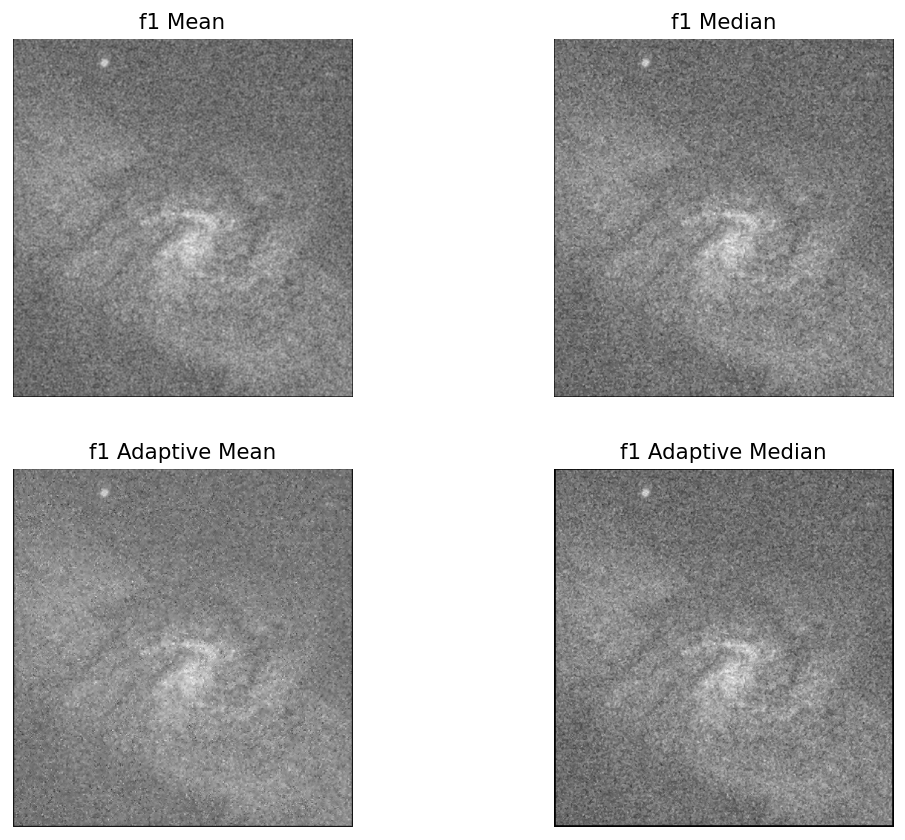

In [55]:
plt.figure(figsize=(10,8), dpi=128)

plt.subplot(221)
plt.imshow(results["f1_mean"], cmap='gray')
plt.title("f1 Mean"); plt.axis('off')

plt.subplot(222)
plt.imshow(results["f1_median"], cmap='gray')
plt.title("f1 Median"); plt.axis('off')

plt.subplot(223);
plt.imshow(results["f1_adaptive_mean"], cmap='gray')
plt.title("f1 Adaptive Mean"); plt.axis('off')

plt.subplot(224)
plt.imshow(results["f1_adaptive_median"], cmap='gray')
plt.title("f1 Adaptive Median"); plt.axis('off')
plt.show()

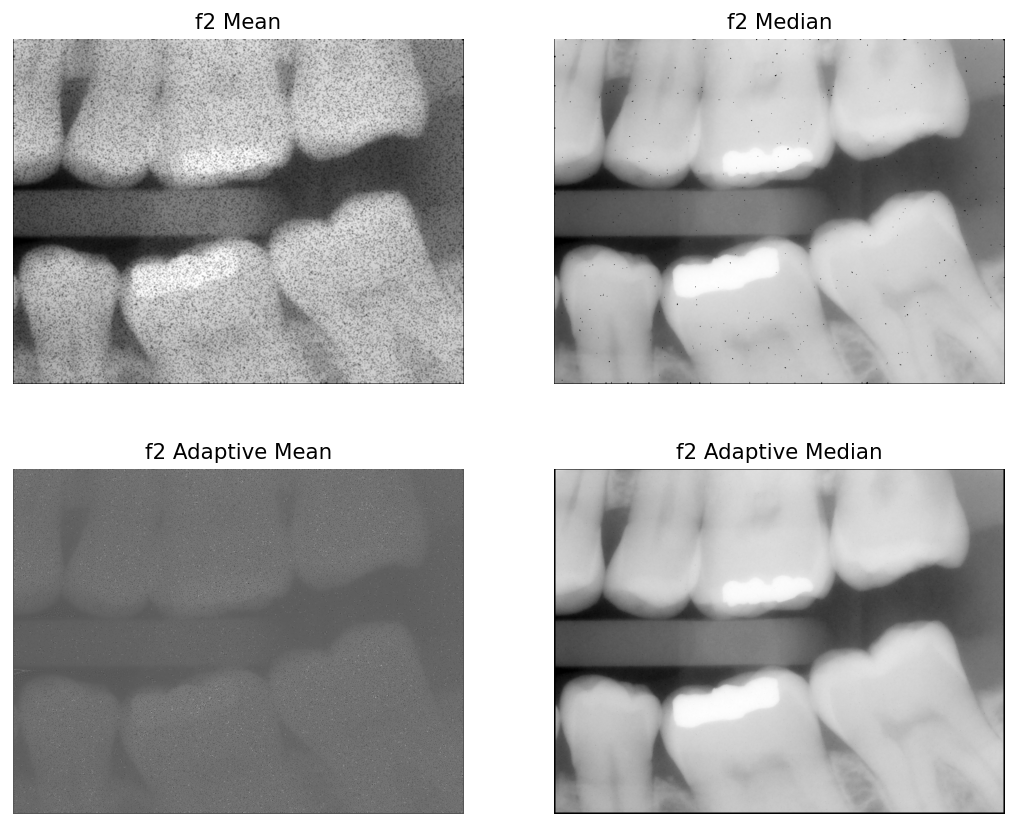

In [56]:
plt.figure(figsize=(10,8), dpi=128)

plt.subplot(221)
plt.imshow(results["f2_mean"], cmap='gray')
plt.title("f2 Mean")
plt.axis('off')

plt.subplot(222)
plt.imshow(results["f2_median"], cmap='gray')
plt.title("f2 Median")
plt.axis('off')

plt.subplot(223)
plt.imshow(results["f2_adaptive_mean"], cmap='gray')
plt.title("f2 Adaptive Mean")
plt.axis('off')

plt.subplot(224)
plt.imshow(results["f2_adaptive_median"], cmap='gray')
plt.title("f2 Adaptive Median")
plt.axis('off')

plt.show()